In [1]:
import numpy as np
from datetime import date,datetime
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

#### Com o investimento para expansão de uma loja, a empresa pode ter os seguintes objetivos:

Maximizar sua receita e rentabilidade no curto prazo, onde pode ser mais vantojoso investir em uma loja com bons valores de vendas, pois já há uma forte base de clientes consolidada
e um positivo histórico de vendas.
Ou, a empresa pode estar buscando expandir sua presença para novos mercados ou melhorar sua posição competitiva em um mercado já existente, onde pode ser vantajoso investir em uma loja
com valores de vendas mais baixos, porém com um bom potencial de crescimento.

Para esta análise, será considerado como objetivo, expandir a presença da rede Walmart em novos mercados, e/ou melhor sua posição competitiva no mercado o qual ela atua.


## Importação do Dataset

In [2]:
# Importação do dataset como o dataframe 'df', e transformando o dtype da coluna 'date' para datetime

df = pd.read_csv('Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Verficando os dtypes e uso de memória

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
# Criando as colunas de mês e ano para o dataframe

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [5]:
# Não há dados nulos em nenhuma das colunas do dataframe

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
dtype: int64

In [6]:
# Não há linhas duplicadas no dataframe 

df.duplicated().sum()

0

## Análise Exploratória de Dados

In [7]:
# Com o intuito de analisar vendas reais sem a interferência de sazonalidades, as quais podem aumentar os valores das vendas, os feriados serão retirados do dataframe a ser analisado
# Criando um dataframe sem feriados 

df_no_holidays = df[df['Holiday_Flag'] == 0]
df_no_holidays.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,5985.000000,5.985000e+03,5985.0,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000
mean,23.000000,1.041256e+06,0.0,61.448124,3.368467,171.601725,7.993514,6.338346,2010.977444
std,12.988258,5.589574e+05,0.0,18.076892,0.461158,39.364794,1.875664,3.145583,0.799184
min,1.000000,2.099862e+05,0.0,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.513784e+05,0.0,48.730000,2.932000,131.784000,6.891000,4.000000,2010.000000
50%,23.000000,9.562112e+05,0.0,63.560000,3.475000,182.622509,7.874000,6.000000,2011.000000
75%,34.000000,1.414344e+06,0.0,75.320000,3.744000,212.861131,8.595000,9.000000,2012.000000
max,45.000000,3.818686e+06,0.0,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000


In [8]:
# Excluindo os meses que contêm feriados, com intuito de eliminar a existência de sazonalidades na análise das vendas

df_no_holidays = df_no_holidays[(df_no_holidays['Month'] != 11) & (df_no_holidays['Month'] != 12)]
df_no_holidays

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


##### Qual o preço médio de venda semanal por loja?

In [9]:
# Preço médio semanal por loja

df_weekly_sales = df_no_holidays.groupby('Store').mean().reset_index()
df_weekly_sales.drop(['Holiday_Flag','Month','Year'], axis=1, inplace=True)
df_weekly_sales.sort_values('Weekly_Sales', ascending=False)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_33972\846966670.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
19,20,2.040245e+06,58.272605,3.445840,209.171575,7.381899
3,4,2.037517e+06,65.429412,3.252613,128.742076,5.930151
13,14,1.961449e+06,60.440840,3.445840,186.400068,8.651521
12,13,1.947555e+06,56.743109,3.320160,128.742076,6.983992
1,2,1.871022e+06,71.054622,3.256487,215.784858,7.595370
9,10,1.825115e+06,74.806218,3.612134,128.742076,8.347319
26,27,1.734031e+06,59.791429,3.604303,139.087849,8.006412
0,1,1.523857e+06,71.028235,3.256487,216.135764,7.572277
5,6,1.523045e+06,72.305630,3.256487,217.693510,6.579412
38,39,1.412577e+06,72.939916,3.256487,214.866728,7.833555


#### Da loja com maior venda acumulada, quantas semanas do ano ela ultrapassou a média do período?

In [10]:
# Valor médio semanal de vendas do período

weekly_sales_mean = df_weekly_sales['Weekly_Sales'].mean()
weekly_sales_mean

1019786.1183716154

In [11]:
# Verificando qual a loja com maior venda acumulada no período

df_sort_sales = df_no_holidays.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales',ascending=False)
df_sort_sales

# Loja 20 possui o maior valor de venda acumulada 
# Loja 33 possui o menor valor de venda acumulada

,Store,Weekly_Sales
19,20,2.427891e+08
3,4,2.424645e+08
13,14,2.334124e+08
12,13,2.317591e+08
1,2,2.226517e+08
9,10,2.171886e+08
26,27,2.063497e+08
0,1,1.813390e+08
5,6,1.812424e+08
38,39,1.680967e+08


In [12]:
# Verificando quantas vezes a Loja 20 ultrapassou a média semanal

df_store_n20 = df_no_holidays[df_no_holidays['Store'] == 20]
n20_above_avarage = (df_store_n20['Weekly_Sales'] > weekly_sales_mean).sum()
print(f'A média semanal do período foi ultrapassada em {n20_above_avarage} semanas pela Loja 20')

A média semanal do período foi ultrapassada em 119 semanas pela Loja 20


## Detecção e Tratamento de Outliers

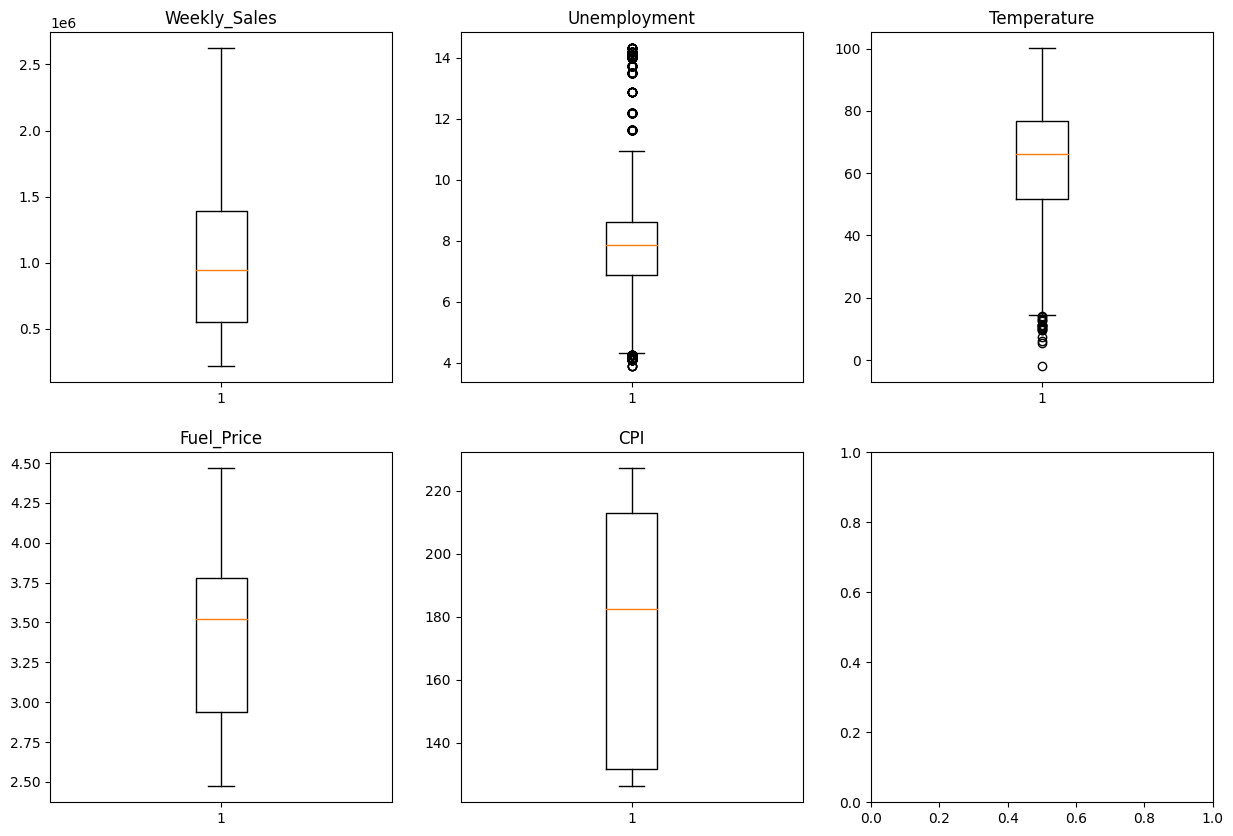

In [13]:
# Boxplot - utilizado para visualização de outliers

fig, axs = plt.subplots(2,3,figsize=(15,10))

axs[0,0].set_title('Weekly_Sales')
axs[0,0].boxplot(df_no_holidays.Weekly_Sales)

axs[0,1].set_title('Unemployment')
axs[0,1].boxplot(df_no_holidays.Unemployment)

axs[0,2].set_title('Temperature')
axs[0,2].boxplot(df_no_holidays.Temperature)

axs[1,0].set_title('Fuel_Price')
axs[1,0].boxplot(df_no_holidays.Fuel_Price)

axs[1,1].set_title('CPI')
axs[1,1].boxplot(df_no_holidays.CPI)

plt.show()

# Os valores abaixo não são considerados outliers, pois todos estão entre valores considerados normais, onde
# os valores temperatura podem ter uma grande disparidade dependendo da estação do ano, e a taxa de desemprego pode ser mais alta ou mais baixa dependendo 
# da situação econômica da região no período

## Calculando a Taxa de Crescimento

In [14]:
# Agrupamento das vendas por loja e ano

grouped_df = df_no_holidays.groupby(['Store','Year'])['Weekly_Sales'].sum().reset_index()
grouped_df

,Store,Year,Weekly_Sales
0,1,2010,54766913.63
1,1,2011,61834265.12
2,1,2012,64737813.26
3,2,2010,70639470.45
4,2,2011,74517607.15
...,...,...,...
130,44,2011,12115970.59
131,44,2012,13523258.42
132,45,2010,28354833.19
133,45,2011,30733329.15


In [15]:
# Cálculo da variação percentual das vendas em relação ao ano anterior

grouped_df['Percent_Var'] = grouped_df.groupby('Store')['Weekly_Sales'].pct_change() * 100
grouped_df['Percent_Var'] = grouped_df['Percent_Var'].fillna(0)
grouped_df

,Store,Year,Weekly_Sales,Percent_Var
0,1,2010,54766913.63,0.000000
1,1,2011,61834265.12,12.904418
2,1,2012,64737813.26,4.695694
3,2,2010,70639470.45,0.000000
4,2,2011,74517607.15,5.490042
...,...,...,...,...
130,44,2011,12115970.59,15.779851
131,44,2012,13523258.42,11.615147
132,45,2010,28354833.19,0.000000
133,45,2011,30733329.15,8.388326


In [29]:
# Cálculo da taxa média de crescimento anual de cada loja

avg_growth = grouped_df.groupby('Store')['Percent_Var'].mean().reset_index()
avg_growth.head()

,Store,Percent_Var
0,1,5.866704
1,2,3.161685
2,3,7.678312
3,4,8.210157
4,5,7.202966


In [17]:
# Renomeando a coluna 'Percent_Var' do df avg_growth para 'Avg_Growth', e criando um novo dataframe com as informações necessárias por meio de uma junção do
# dataframe df_weekly_sales e avg_growth 

avg_growth.rename(columns={'Percent_Var': 'Avg_Growth'}, inplace=True)
df2 = pd.merge(df_weekly_sales, avg_growth, on='Store')
df2.head()
# df2.sort_values('Avg_Growth', ascending= False)

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Avg_Growth
0,1,1.523857e+06,71.028235,3.256487,216.135764,7.572277,5.866704
1,2,1.871022e+06,71.054622,3.256487,215.784858,7.595370,3.161685
2,3,3.925106e+05,73.848571,3.256487,219.533545,7.146731,7.678312
3,4,2.037517e+06,65.429412,3.252613,128.742076,5.930151,8.210157
4,5,3.098301e+05,72.005042,3.256487,216.704980,6.259328,7.202966


In [18]:
# Com o objetivo de investir em lojas que tenham um valor baixo em vendas, porém com uma boa taxa de crescimento, as lojas com maiores valores serão retiradas da análise,
# restando apenas as lojas que possuem vendas com valor abaixo de 50% das vendas da Loja 20, a qual é a loja com maior valor de vendas semanais

n20_sale = df2.loc[df2['Store'] == 20, 'Weekly_Sales'].values[0]
print(f'Todas as lojas que possuem o valor de vendas semanais abaixo de {n20_sale*0.5}, são mantidas no df para análise')
df3 = df2.loc[df2['Weekly_Sales'] < 0.5 * n20_sale]
df3.sort_values('Avg_Growth', ascending= False)

Todas as lojas que possuem o valor de vendas semanais abaixo de 1020122.4471008403, são mantidas no df para análise


,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Avg_Growth
37,38,386157.418571,73.269916,3.639840,128.742076,13.042336,11.818370
6,7,552970.614034,42.662353,3.276412,193.700140,8.548832,9.735567
43,44,303394.045798,56.743109,3.320160,128.742076,6.715244,9.131666
2,3,392510.560252,73.848571,3.256487,219.533545,7.146731,7.678312
16,17,876315.385378,49.535378,3.320160,128.742076,6.519765,7.672029
8,9,529387.603697,70.730000,3.256487,219.768921,6.068370,7.337527
4,5,309830.094874,72.005042,3.256487,216.704980,6.259328,7.202966
41,42,553940.818067,74.806218,3.612134,128.742076,8.347319,6.831948
7,8,885197.746639,65.611092,3.256487,219.581084,6.063891,5.529531
33,34,943165.410756,61.559496,3.252613,128.742076,9.900345,5.266492


In [19]:
# Como a taxa de crescimento é uma das métricas importantes para escolher uma loja, será feito um filtro, onde serão mantidas apenas as 5 lojas com maiores valores de 'Avg_Growth'

top_5_stores = df3.nlargest(5, 'Avg_Growth')['Store'].tolist()
top_5_stores
df_5_stores = df3.loc[df3['Store'].isin(top_5_stores)]
df_5_stores.sort_values('Avg_Growth', ascending= False)

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Avg_Growth
37,38,386157.418571,73.269916,3.639840,128.742076,13.042336,11.818370
6,7,552970.614034,42.662353,3.276412,193.700140,8.548832,9.735567
43,44,303394.045798,56.743109,3.320160,128.742076,6.715244,9.131666
2,3,392510.560252,73.848571,3.256487,219.533545,7.146731,7.678312
16,17,876315.385378,49.535378,3.320160,128.742076,6.519765,7.672029


## Análise das Variáveis

Text(0, 0.5, 'Vendas ($)')

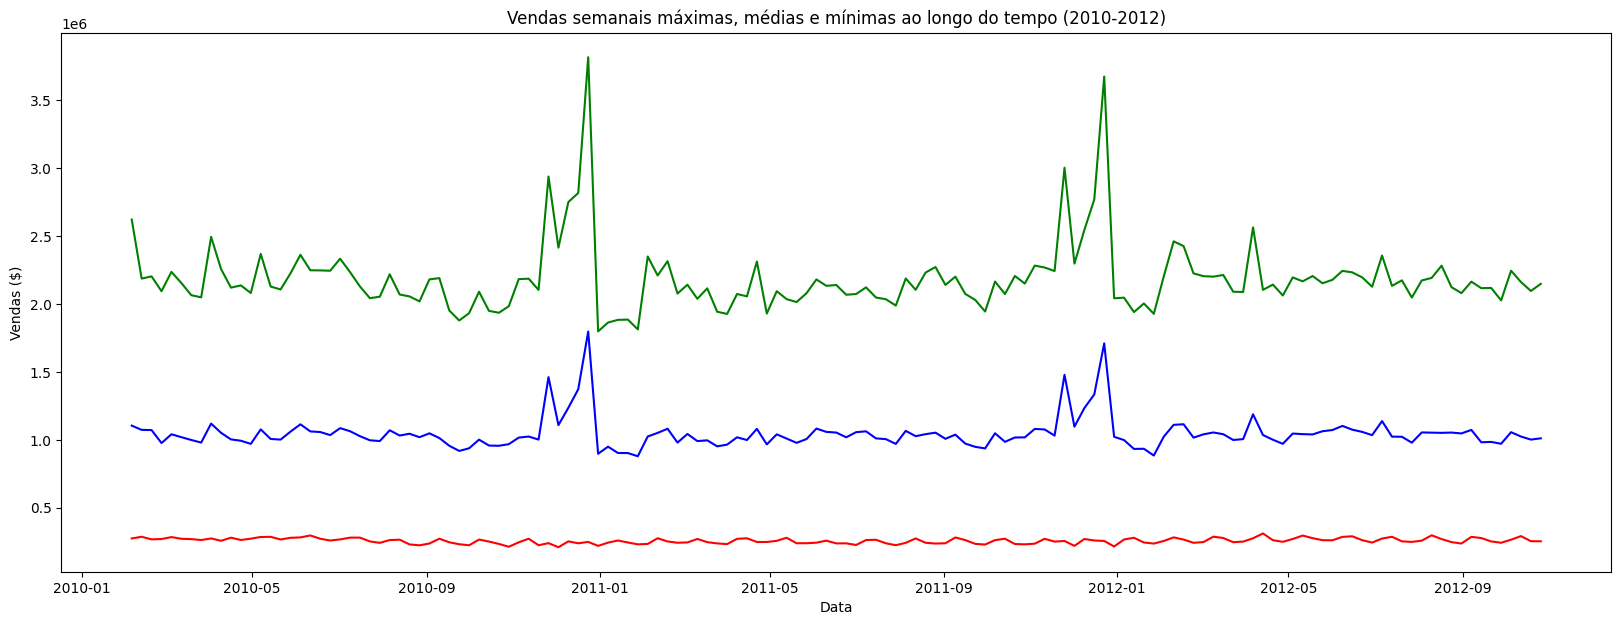

In [20]:
# Gráfico de vendas semanais máximas, médias e minimimas para identificação de sazonalidades e a disparidade entre os valores

# Criação de um df para fornecer as informações do gráfico

df4 = df.groupby('Date')['Weekly_Sales'].agg(['max','mean','min'])

# Construção do gráfico

fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df4.index, df4['max'], label= 'Vendas Máximas', color = 'green')
ax.plot(df4.index, df4['mean'], label= 'Vendas Médias', color = 'blue')
ax.plot(df4.index, df4['min'], label= 'Vendas Mínimas', color = 'red')

ax.set_title('Vendas semanais máximas, médias e mínimas ao longo do tempo (2010-2012)')
ax.set_xlabel('Data')
ax.set_ylabel('Vendas ($)')

# Com base no gráfico abaixo, é possível concluir que mesmo excluindo os meses de feriados, ainda existe um aumento nas vendas das lojas em análise, 
# devido à sazonalidades, as quais são referentes aos meses de novembro (Dia de ação de graças) e dezembro (Natal)

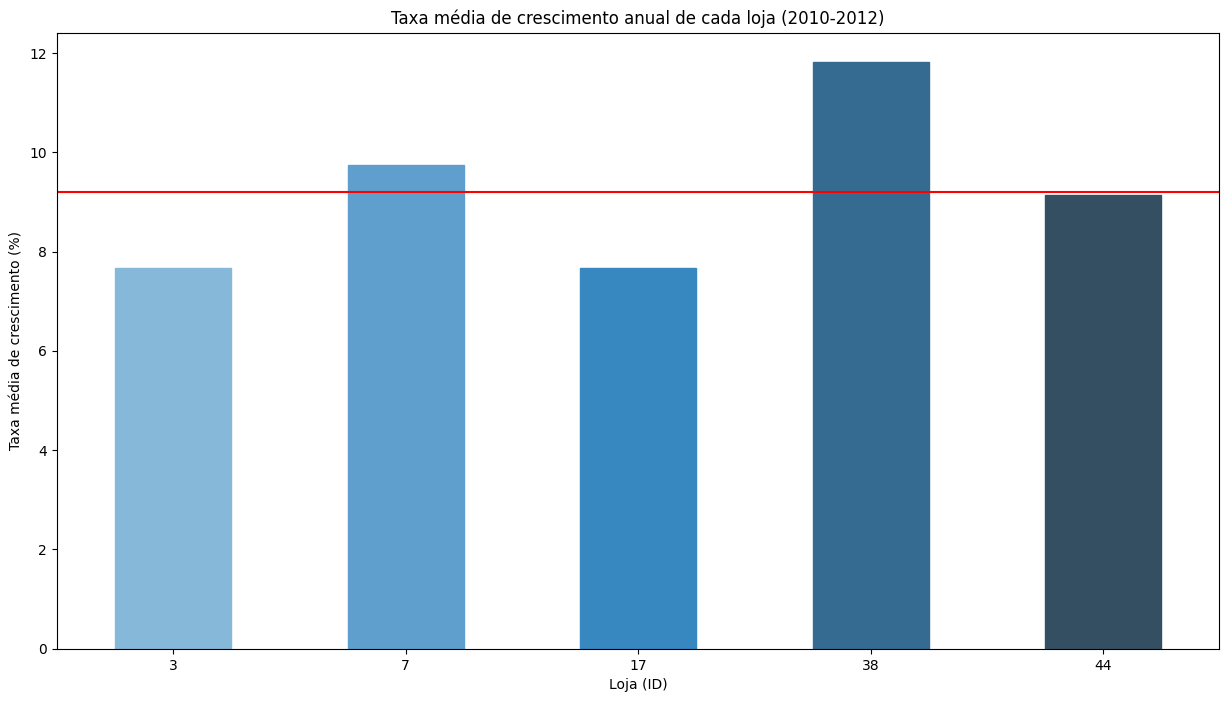

In [21]:
# Comparação das taxas médias de crescimento anual de cada loja

# Crescimento médio entre as lojas
mean_avg_growth = df_5_stores['Avg_Growth'].mean()

# cria um novo dataframe com a coluna 'Store' como índice
df5 = df_5_stores.set_index('Store')

# cria o gráfico de barras com paleta de cores
ax = df5['Avg_Growth'].plot(kind='bar', figsize=(15, 8), color='blue')

# adiciona os rótulos dos eixos
ax.set_xlabel('Loja (ID)')
ax.set_ylabel('Taxa média de crescimento (%)')

# adiciona um título ao gráfico
ax.set_title('Taxa média de crescimento anual de cada loja (2010-2012)')

# rotaciona os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Deixando cada barra com uma cor única
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Blues_d", len(df5))[i])

# adiciona a linha da média
ax.axhline(mean_avg_growth, color='r')    

plt.show()

# Apenas as lojas 7 e 38 passam da média das 5 lojas, e a loja 44 se aproxima muito da média

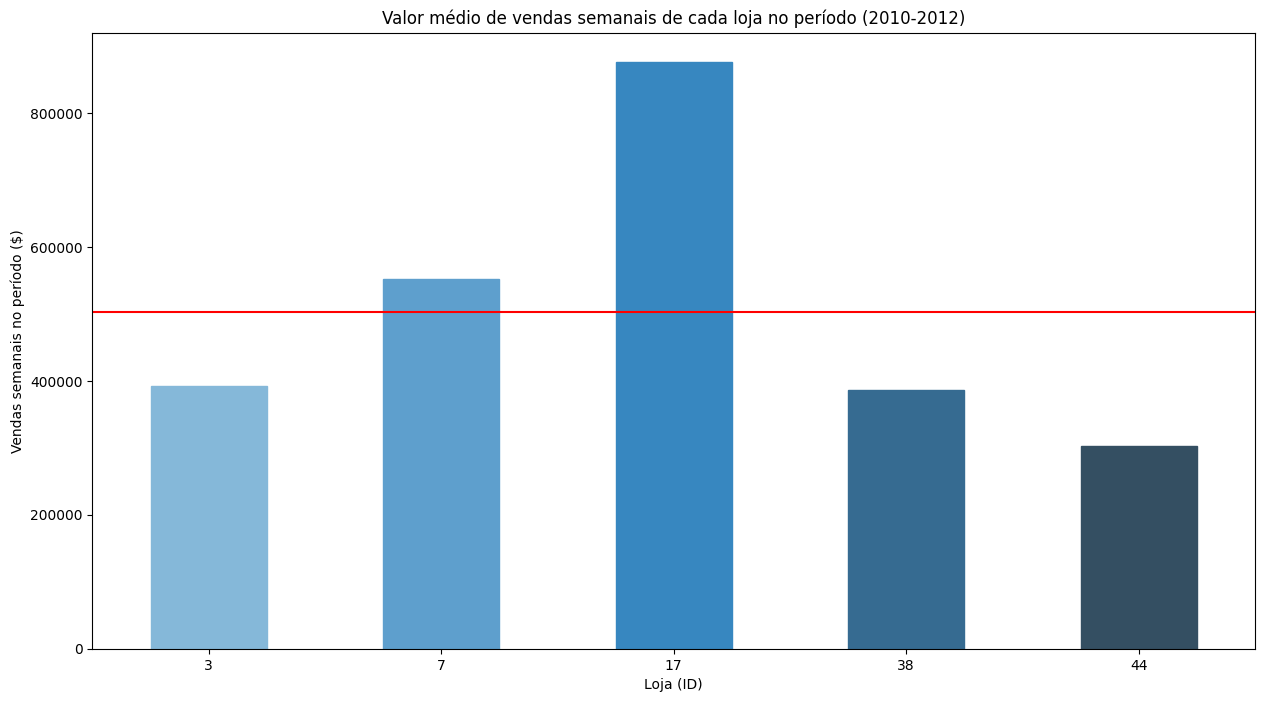

In [22]:
# Comparação das vendas semanais no período

# Valor médio das vendas entre as lojas
mean_sales = df_5_stores['Weekly_Sales'].mean()

# cria um novo dataframe com a coluna 'Store' como índice
df6 = df_5_stores.set_index('Store')

# cria o gráfico de barras com paleta de cores
ax = df6['Weekly_Sales'].plot(kind='bar', figsize=(15, 8), color='blue')

# adiciona os rótulos dos eixos
ax.set_xlabel('Loja (ID)')
ax.set_ylabel('Vendas semanais no período ($)')

# adiciona um título ao gráfico
ax.set_title('Valor médio de vendas semanais de cada loja no período (2010-2012)')

# rotaciona os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Deixando cada barra com uma cor única
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Blues_d", len(df5))[i])

# adiciona a linha da média
ax.axhline(mean_sales, color='r')    

plt.show()

# Apenas as lojas 7 e 17 passam da média de vendas das 5 lojas

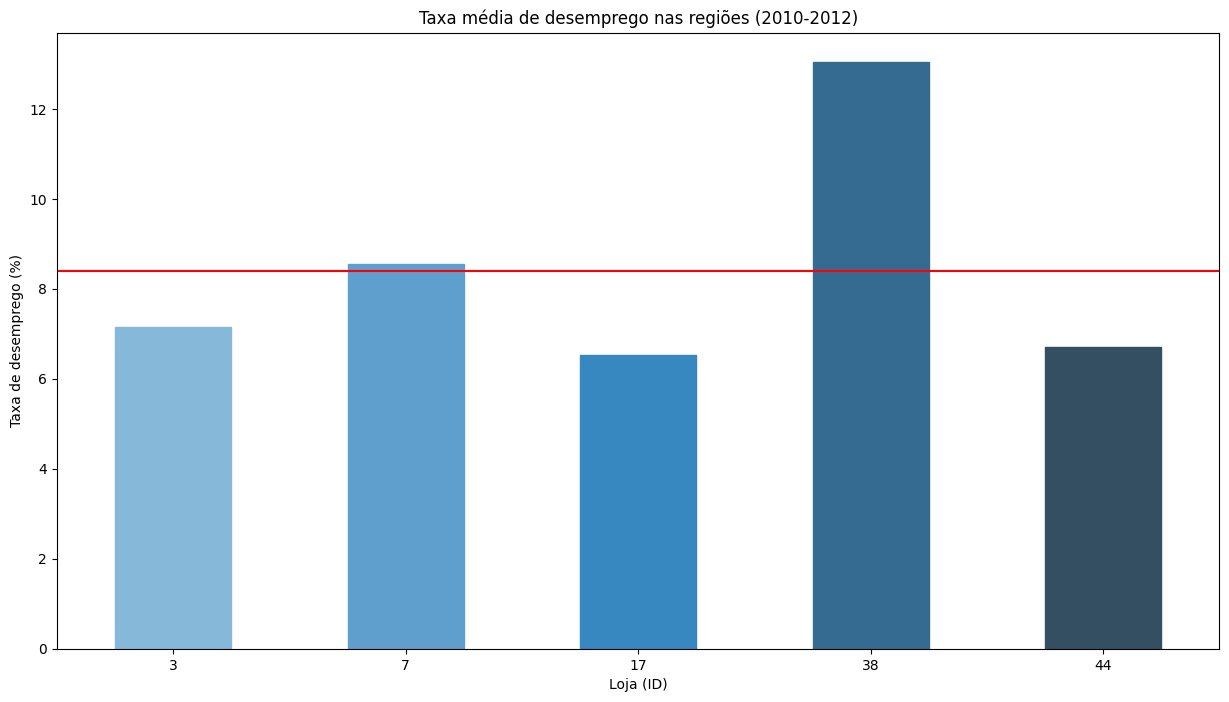

In [23]:
# Comparação das taxas de desemprego por região no período

# Valor médio das vendas entre as lojas
mean_unemployment = df_5_stores['Unemployment'].mean()

# cria um novo dataframe com a coluna 'Store' como índice
df7 = df_5_stores.set_index('Store')

# cria o gráfico de barras com paleta de cores
ax = df7['Unemployment'].plot(kind='bar', figsize=(15, 8), color='blue')

# adiciona os rótulos dos eixos
ax.set_xlabel('Loja (ID)')
ax.set_ylabel('Taxa de desemprego (%)')

# adiciona um título ao gráfico
ax.set_title('Taxa média de desemprego nas regiões (2010-2012)')

# rotaciona os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Deixando cada barra com uma cor única
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Blues_d", len(df5))[i])

# adiciona a linha da média
ax.axhline(mean_unemployment, color='r')    

plt.show()

# Apenas as lojas 7 e 38 passam da média de vendas das 5 lojas, o que nesse caso não é um ponto positivo, 
# mas ao ver que a loja 7 passa da média de vendas e da taxa de crescimento, pode-se concluir que 
# a taxa de desemprego não é algo que afeta significativamente o desempenho da loja em suas vendas

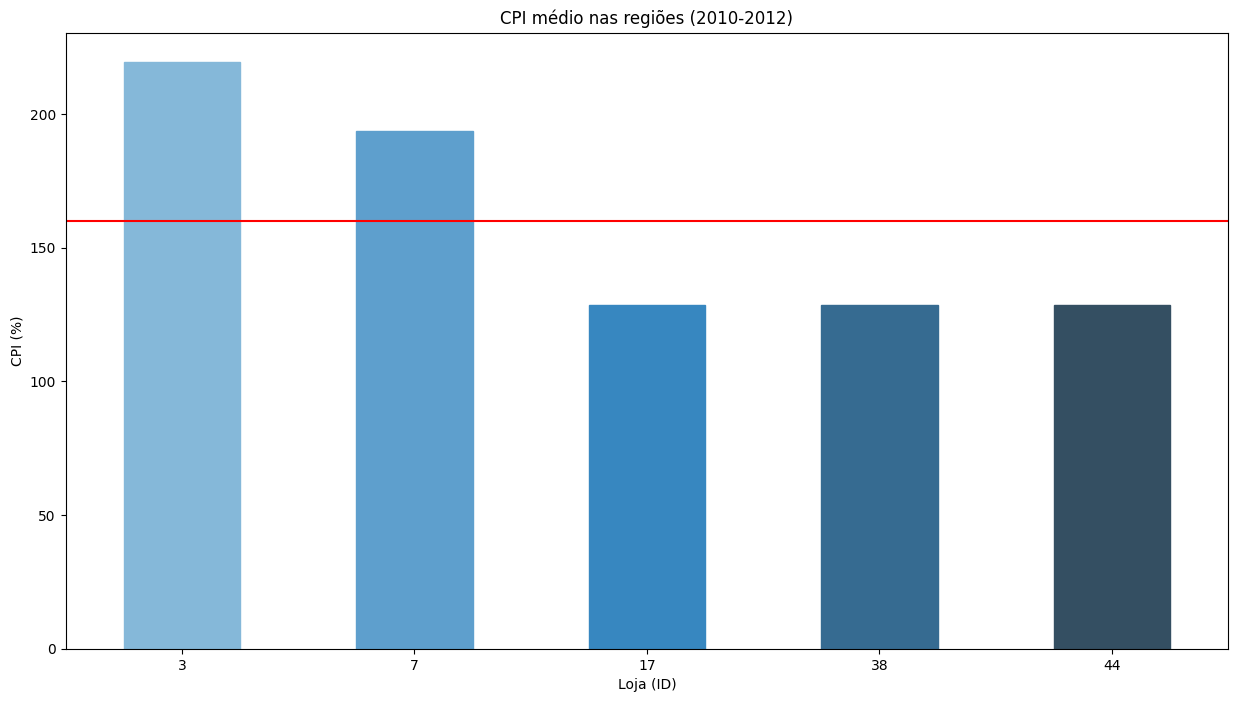

In [24]:
# Comparação dos valores de CPI (índices de Preço ao Consumidor)

# Valor médio das vendas entre as lojas
mean_cpi = df_5_stores['CPI'].mean()

# cria um novo dataframe com a coluna 'Store' como índice
df8 = df_5_stores.set_index('Store')

# cria o gráfico de barras com paleta de cores
ax = df8['CPI'].plot(kind='bar', figsize=(15, 8), color='blue')

# adiciona os rótulos dos eixos
ax.set_xlabel('Loja (ID)')
ax.set_ylabel('CPI (%)')

# adiciona um título ao gráfico
ax.set_title('CPI médio nas regiões (2010-2012)')

# rotaciona os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Deixando cada barra com uma cor única
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Blues_d", len(df5))[i])

# adiciona a linha da média
ax.axhline(mean_cpi, color='r')    

plt.show()

# Apenas as lojas 3 e 7 passam da média de vendas das 5 lojas, o que nesse caso não é um ponto positivo, 
# mas ao ver que a loja 7 passa da média de vendas e da taxa de crescimento, pode-se concluir que 
# o CPI não é algo que afeta significativamente o desempenho da loja em suas vendas

<AxesSubplot: >

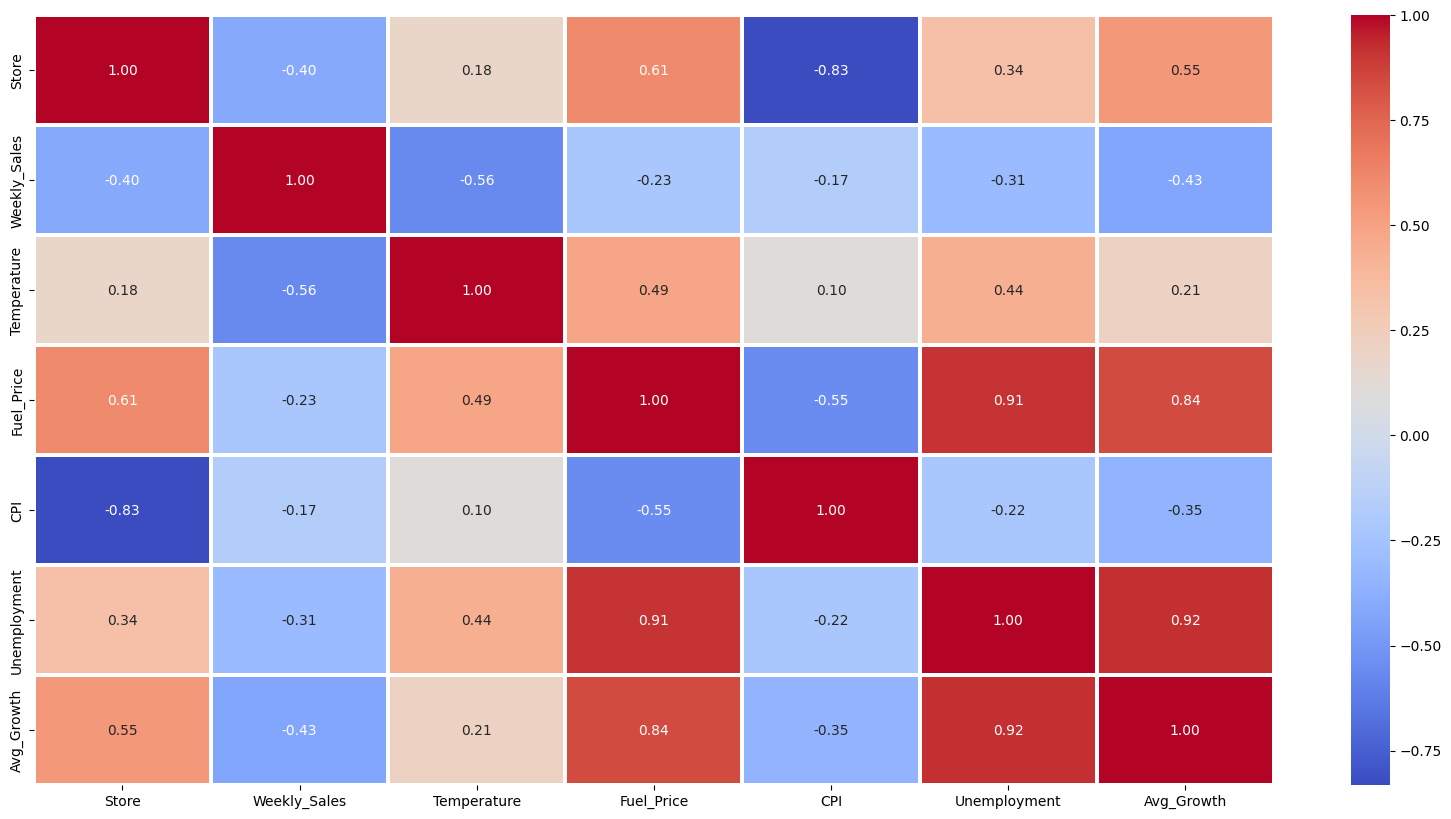

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_5_stores.corr(), annot = True, linewidths=1.5 , fmt = '.2f', cmap='coolwarm')

# Todas as correlações com a variável 'Weekly_Sales' possuem valores negativos, sendo assim, não afetam a vendas das lojas de maneira direta

## Seleção da Loja à Ser Investida

#### Cálculo de crescimento das lojas após 5 anos

In [26]:
# Importando a biblioteca 'locale' para fazer a separação por milhar dos valores

import locale

# Configurando a biblioteca para o formato utilizado nos EUA

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Cálculo do crescimento das vendas das lojas em 5 anos utilizando a fórmula de juros compostos

# FV = PV * (1 + r_mensal)^n

# onde:

# FV é o valor futuro das vendas após 5 anos
# PV é o valor atual das vendas
# r é a taxa média de crescimento anual, que deve ser convertida para a taxa de juros periódica (mensal, trimestral, semestral, etc.)
    # r_mensal = (1 + r)^(1/12) - 1
    # r_mensal = (1 + 0.1)^(1/12) - 1
    # r_mensal = 0.007974
# n é o número de períodos (mensal, trimestral, semestral, etc.) em 5 anos // neste caso, usamos períodos mensais, sendo assim 5 anos = 60 meses

n5 = 60
fv5 = []
for v in df_5_stores['Store']:
    pv = df_5_stores.loc[df_5_stores['Store'] == v, 'Weekly_Sales'].item()
    r = df_5_stores.loc[df_5_stores['Store'] == v, 'Avg_Growth']/100
    r_month = (1 + r)**(1/12) - 1
    fv = pv * (1 + r_month)**n5
    fv = fv.item()
    pct_increase = (fv - pv) / pv * 100 # Cálculo do aumento de vendas em porcentagem
    fv5.append(fv)
    print(f'Loja {v}:')
    print(f'O valor atual das vendas é de ${locale.format_string("%.2f", pv, grouping=True)}')
    print(f'O valor futuro das vendas após 5 anos é de ${locale.format_string("%.2f", fv, grouping=True)}')
    print(f'Este valor equivale a um aumento de {pct_increase:.2f}% nas vendas da loja\n')
    


Loja 3:
O valor atual das vendas é de $392,510.56
O valor futuro das vendas após 5 anos é de $568,188.63
Este valor equivale a um aumento de 44.76% nas vendas da loja

Loja 7:
O valor atual das vendas é de $552,970.61
O valor futuro das vendas após 5 anos é de $879,911.76
Este valor equivale a um aumento de 59.12% nas vendas da loja

Loja 17:
O valor atual das vendas é de $876,315.39
O valor futuro das vendas após 5 anos é de $1,268,162.54
Este valor equivale a um aumento de 44.72% nas vendas da loja

Loja 38:
O valor atual das vendas é de $386,157.42
O valor futuro das vendas após 5 anos é de $675,041.02
Este valor equivale a um aumento de 74.81% nas vendas da loja

Loja 44:
O valor atual das vendas é de $303,394.05
O valor futuro das vendas após 5 anos é de $469,635.57
Este valor equivale a um aumento de 54.79% nas vendas da loja



#### Cálculo de crescimento das lojas após 10 anos

In [27]:
# Cálculo do crescimento das vendas das lojas em 10 anos utilizando a fórmula de juros compostos

n10 = 120
fv10 = []
for v in df_5_stores['Store']:
    pv = df_5_stores.loc[df_5_stores['Store'] == v, 'Weekly_Sales'].item()
    r = df_5_stores.loc[df_5_stores['Store'] == v, 'Avg_Growth']/100
    r_month = (1 + r)**(1/12) - 1
    fv = pv * (1 + r_month)**n10
    fv = fv.item()
    pct_increase = (fv - pv) / pv * 100
    fv10.append(fv)
    print(f'Loja {v}:')
    print(f'O valor atual das vendas é de ${locale.format_string("%.2f", pv, grouping=True)}')
    print(f'O valor futuro das vendas após 10 anos é de ${locale.format_string("%.2f", fv, grouping=True)}')
    print(f'Este valor equivale a um aumento de {pct_increase:.2f}% nas vendas da loja\n')
    

Loja 3:
O valor atual das vendas é de $392,510.56
O valor futuro das vendas após 10 anos é de $822,495.87
Este valor equivale a um aumento de 109.55% nas vendas da loja

Loja 7:
O valor atual das vendas é de $552,970.61
O valor futuro das vendas após 10 anos é de $1,400,155.24
Este valor equivale a um aumento de 153.21% nas vendas da loja

Loja 17:
O valor atual das vendas é de $876,315.39
O valor futuro das vendas após 10 anos é de $1,835,225.38
Este valor equivale a um aumento de 109.43% nas vendas da loja

Loja 38:
O valor atual das vendas é de $386,157.42
O valor futuro das vendas após 10 anos é de $1,180,037.87
Este valor equivale a um aumento de 205.58% nas vendas da loja

Loja 44:
O valor atual das vendas é de $303,394.05
O valor futuro das vendas após 10 anos é de $726,967.36
Este valor equivale a um aumento de 139.61% nas vendas da loja



#### Conclusão

Como o objetivo da rede é expandir a sua presença para novos mercados e/ou melhor sua posição competitiva no mercado em que atua, o foco nesta análise foi encontrar uma loja com um baixo valor de vendas, porém que tivesse um bom potêncial de crescimento.

Opção de investimento a ser realizado: O investimento pode ser direcionado para melhorar a experiência do cliente, aumentar a visibilidade da loja, reduzir os custos operacionais e ajustar a oferta de produtos ou serviços de acordo com as necessidades do mercado local.

#### Loja 38:

O investimento para expansão deve ser realizado na Loja 38, pois dentre as 5 lojas selecionadas como potêncial de investimento, ela possui a maior taxa média de crescimento anual e apresentou maior aumento nas vendas quando comparada às outras lojas, sendo 74,81% de aumento em 5 anos, e 205,58% de aumento em 10 anos.

Por mais que no período analisado ela tenha o segundo menor valor de vendas, seu valor acaba superando as outras lojas ao longo do tempo, por conta de sua alta taxa de crescimento anual.